In [71]:
import pandas as pd
dataset = pd.read_csv('student-mat.csv', sep=';')
dataset.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [72]:
dataset.shape

(395, 33)

In [73]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [74]:
dataset.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [75]:
dataset["avg_grade"] = dataset[["G1", "G2", "G3"]].mean(axis=1)


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
dataset['pass'] = dataset['failures'].apply(lambda x: 1 if x == 0 else 0)

In [78]:
X = dataset.drop(['G1', 'G2', 'G3', 'avg_grade', 'pass'], axis=1)
y = dataset['pass']
dataset.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_grade,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,1


In [79]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [81]:
y_pred = model.predict(X_test)

In [82]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0]
 [ 0 65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        65

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

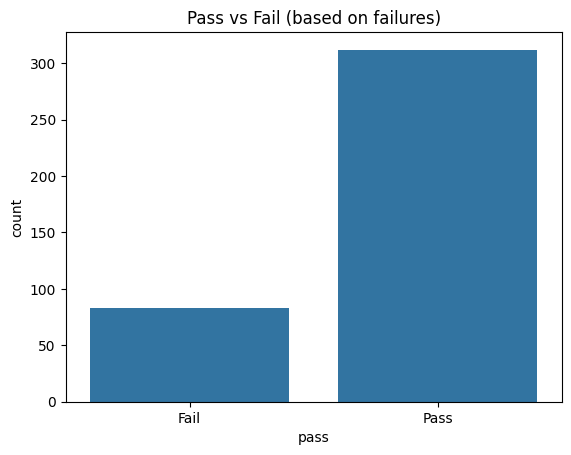

In [84]:
# Count of Pass/Fail
sns.countplot(x='pass', data=dataset)
plt.title("Pass vs Fail (based on failures)")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.show()

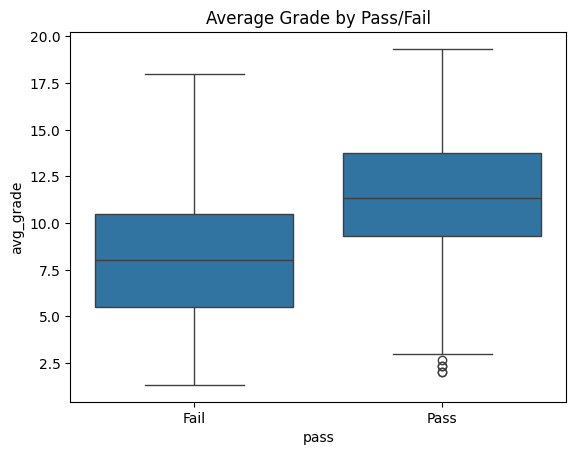

In [85]:
# Average grade by Pass/Fail
sns.boxplot(x='pass', y='avg_grade', data=dataset)
plt.title("Average Grade by Pass/Fail")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.show()

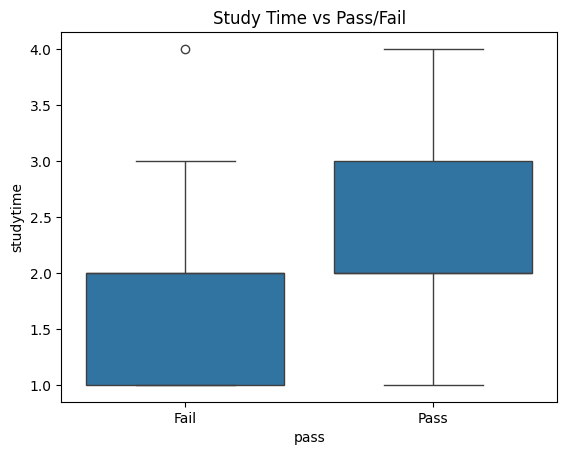

In [86]:
# Study time vs Pass/Fail
sns.boxplot(x='pass', y='studytime', data=dataset)
plt.title("Study Time vs Pass/Fail")
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.show()

C:\Users\Uttam Madaliya\AppData\Local\Temp\ipykernel_22108\1277268736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='pass', data=age_pass_rate, palette='viridis')


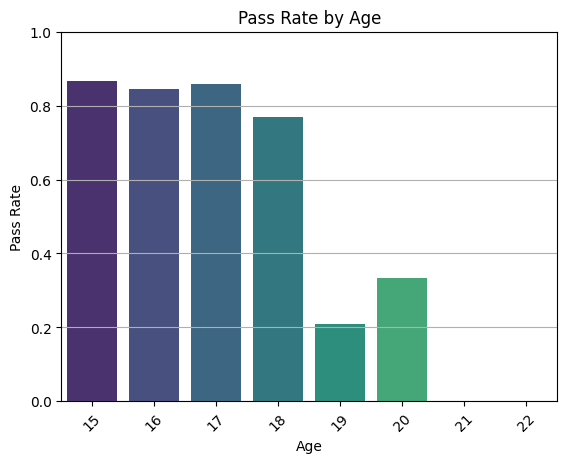

In [87]:
# Calculate pass rate per age
age_pass_rate = dataset.groupby('age')['pass'].mean().reset_index()

sns.barplot(x='age', y='pass', data=age_pass_rate, palette='viridis')
plt.title("Pass Rate by Age")
plt.ylabel("Pass Rate")
plt.xlabel("Age")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

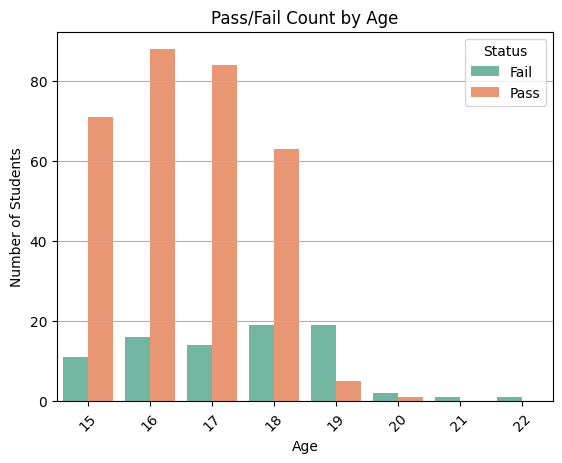

In [88]:
sns.countplot(x='age', hue='pass', data=dataset, palette='Set2')
plt.title("Pass/Fail Count by Age")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.legend(title='Status', labels=['Fail', 'Pass'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\Uttam Madaliya\AppData\Local\Temp\ipykernel_22108\1590345322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=feature_importance_df.head(15), palette='coolwarm')


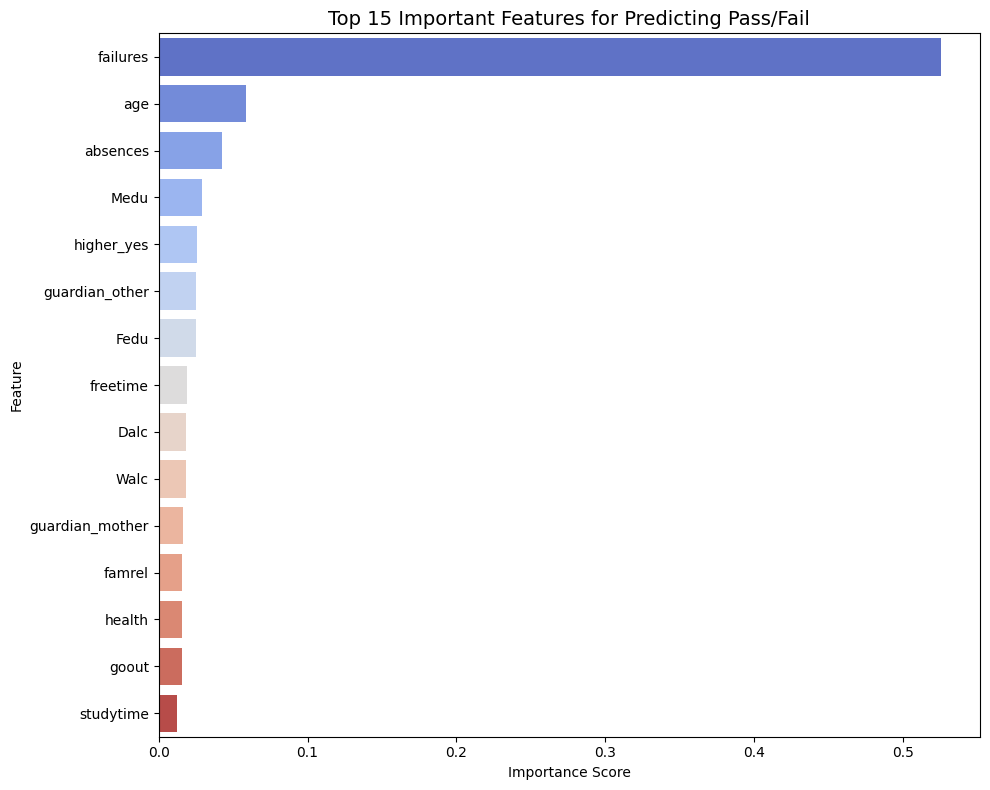

In [89]:

# Plotting the top 15 important features
plt.figure(figsize=(10, 8))
sns.barplot(y='Feature', x='Importance', data=feature_importance_df.head(15), palette='coolwarm')
plt.title('Top 15 Important Features for Predicting Pass/Fail', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

C:\Users\Uttam Madaliya\AppData\Local\Temp\ipykernel_22108\651427009.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failures', y='age', data=dataset,ax=axes[0], palette='pastel')
C:\Users\Uttam Madaliya\AppData\Local\Temp\ipykernel_22108\651427009.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failures', y='studytime', data=dataset, ax=axes[1], palette='muted')
C:\Users\Uttam Madaliya\AppData\Local\Temp\ipykernel_22108\651427009.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='failures', y='absences', data=dataset, ax

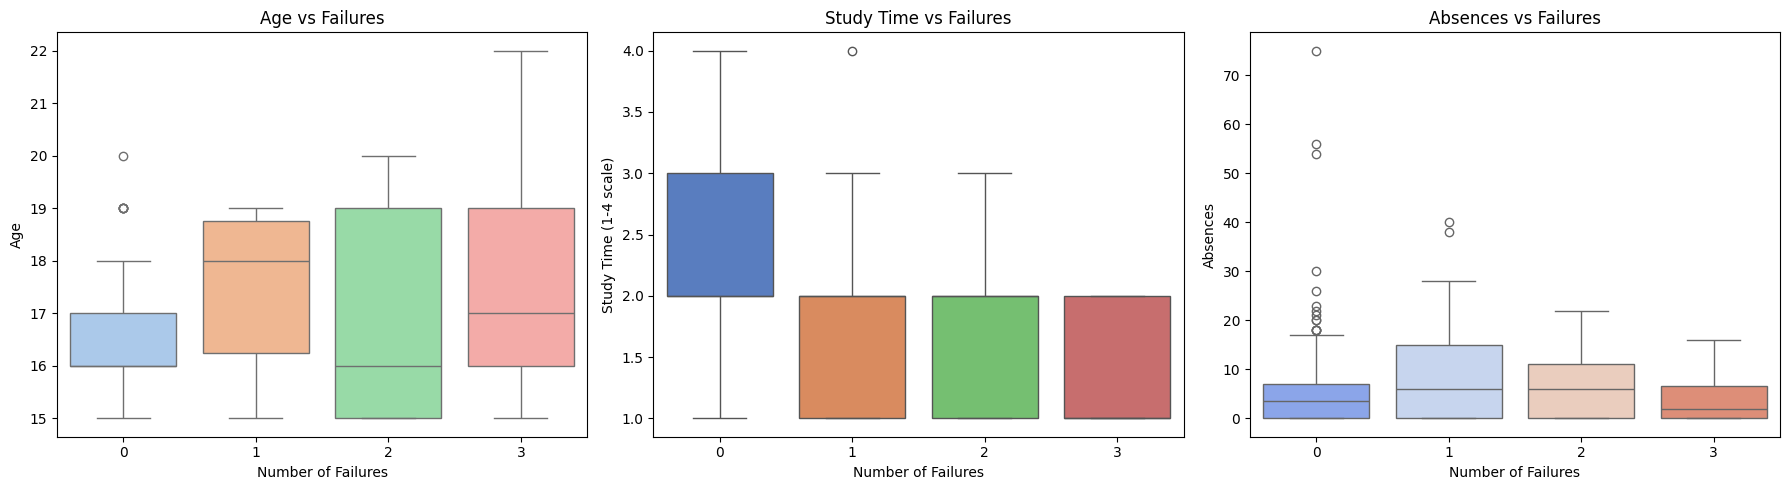

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age vs Failures

sns.boxplot(x='failures', y='age', data=dataset,ax=axes[0], palette='pastel')
axes[0].set_title('Age vs Failures')
axes[0].set_xlabel('Number of Failures')
axes[0].set_ylabel('Age')

# Study Time vs Failures
sns.boxplot(x='failures', y='studytime', data=dataset, ax=axes[1], palette='muted')
axes[1].set_title('Study Time vs Failures')
axes[1].set_xlabel('Number of Failures')
axes[1].set_ylabel('Study Time (1-4 scale)')

# Absences vs Failures
sns.boxplot(x='failures', y='absences', data=dataset, ax=axes[2], palette='coolwarm')
axes[2].set_title('Absences vs Failures')
axes[2].set_xlabel('Number of Failures')
axes[2].set_ylabel('Absences')

plt.tight_layout()
plt.show()